## EVALUACION MODULO 3

Promo 59

María del Rocío Sánchez Gálvez 


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Fase 1: Exploración y Limpieza
## Explotación

In [2]:
#Exploración Inicial:

df_activity = pd.read_csv("./files/Customer_Flight_Activity.csv")
df_history = pd.read_csv("./files/Customer_Loyalty_History.csv")

In [3]:
df_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df_activity.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [5]:
df_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [6]:
df_history.dtypes

Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

In [7]:
df_activity.shape

(405624, 10)

In [8]:
df_history.shape

(16737, 16)

In [9]:
# Valorar si es eficiente eliminar duplicados en "df_activity" - df_activity = df_activity.drop_duplicates()
# df.dtypes.value_counts()
df_activity.duplicated().sum()

np.int64(1864)

In [11]:
df_history.duplicated().sum()

np.int64(0)

In [12]:
df_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [13]:
df_history.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [14]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [15]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [16]:
df_activity.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [17]:
df_history.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [18]:
df_activity['Dollar Cost Points Redeemed'].unique() #verifico que no es necesario cambiar el tipo de dato porque no haydecimales

array([ 0, 28, 30, 25, 36, 32, 24, 26, 37, 33, 35, 27, 31, 54, 42, 29, 38,
       34, 39, 55, 41, 49, 40, 48, 45, 53, 58, 44, 43, 46, 52, 47, 63, 57,
       62, 51, 50, 64, 56, 61, 65, 60, 68, 59, 66, 69, 67, 71, 70])

In [19]:
df_activity['Points Redeemed'].unique() #verifico que no es necesario borrarla ya que hay más valores además del 0

array([  0, 341, 364, 310, 445, 312, 343, 366, 389, 292, 447, 324, 456,
       409, 436, 327, 322, 291, 323, 300, 290, 309, 325, 386, 321, 363,
       340, 670, 443, 517, 444, 328, 344, 367, 313, 333, 293, 449, 297,
       455, 372, 356, 405, 381, 466, 419, 369, 352, 482, 335, 329, 305,
       415, 396, 317, 348, 314, 334, 350, 330, 318, 298, 420, 336, 471,
       680, 441, 353, 484, 301, 374, 417, 501, 299, 398, 307, 368, 306,
       347, 439, 395, 481, 337, 382, 426, 373, 399, 424, 326, 392, 438,
       467, 480, 448, 308, 400, 376, 375, 460, 339, 385, 611, 431, 320,
       362, 404, 442, 410, 361, 319, 435, 414, 464, 477, 315, 485, 370,
       421, 349, 371, 416, 496, 510, 667, 465, 434, 346, 487, 408, 500,
       360, 378, 345, 358, 479, 380, 411, 491, 505, 446, 425, 476, 393,
       418, 332, 401, 454, 303, 594, 506, 355, 302, 403, 379, 437, 561,
       483, 597, 391, 562, 342, 407, 490, 468, 488, 457, 365, 357, 463,
       388, 413, 351, 462, 440, 493, 507, 338, 377, 428, 525, 39

In [20]:
df_activity['Points Accumulated'].unique() #verifico que no es necesario cambiar el tipo de dato porque hay decimales

array([152.  , 203.  , 120.  , ...,  18.75, 601.  , 626.  ])

In [21]:
df_history['Cancellation Year'].unique() # hay nulos y decimales pero deberían ser enteros


array([  nan, 2018., 2015., 2017., 2014., 2016., 2013.])

In [22]:
df_history['Cancellation Month'].unique() # hay nulos y decimales pero deberían ser enteros

array([nan,  1., 12.,  4.,  2.,  7., 11.,  5.,  6., 10.,  8.,  9.,  3.])

In [23]:
df_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [24]:
df_history.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


## Limpieza de datos

In [25]:
df_activity_final = df_activity.copy()

In [26]:
df_history_final = df_history.copy()

In [27]:
df_history_final.drop(columns = ['Postal Code'], inplace = True)
df_history_final.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [28]:
# limpiar nombres de columnas y quitar espacios
df_history_final.columns = (
    df_history_final.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

df_history_final.columns

Index(['loyalty_number', 'country', 'province', 'city', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [29]:
df_activity_final.columns = (
    df_activity_final.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

df_activity_final.columns 

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')

In [30]:
# Gestion de nulos y cambio de tipo de dato: mantengo nulos pero cambio el tipo de dato (de float a entero y utilizo el Int64 para mantener los nulos)
# Nulos en Cancellation Year (14670) y Cancellation Month (14670): puede ser que el cliente no se haya dado de baja, no los elimino.

df_history_final["cancellation_year"] = df_history_final["cancellation_year"].astype("Int64")
df_history_final["cancellation_month"] = df_history_final["cancellation_year"].astype("Int64")

In [ ]:
# Hay nulos en Salary (4238): posiblemente el cliente no quiso dar ese dato o no se dispone de él, los mantengo.

In [31]:
# En salario hay valores negativos, primero miro porcentaje, como hay muy pocos los paso a nulos

# Total de filas y número de salarios negativos
total = len(df_history_final)
negativos = (df_history_final["salary"] < 0).sum()

# Porcentaje
porcentaje_negativos = negativos / total * 100

porcentaje_negativos


np.float64(0.119495728027723)

In [34]:
# Creo una columna llamada salary_clean con valores iguales a la columna 'salary' y después sustituyo los valores negativos por nulos (NaN)

df_history_final["salary_clean"] = df_history_final["salary"]

df_history_final.loc[
    df_history_final["salary_clean"] < 0,
    "salary_clean"
] = np.nan

df_history_final.columns


Index(['loyalty_number', 'country', 'province', 'city', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month', 'salary_clean'],
      dtype='object')

In [33]:
# Creación de una nueva variable o columna: average_salary (salario_promedio) (Iterative Imputer)

In [35]:
# % nulos
nulos = df_history_final.isnull().sum()/df_history_final.shape[0]*100
# % nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

cancellation_year     87.650117
cancellation_month    87.650117
salary_clean          25.440640
salary                25.321145
city                   0.000000
loyalty_number         0.000000
province               0.000000
country                0.000000
marital_status         0.000000
education              0.000000
gender                 0.000000
loyalty_card           0.000000
enrollment_year        0.000000
enrollment_type        0.000000
clv                    0.000000
enrollment_month       0.000000
dtype: float64

In [36]:
df_union = pd.merge(df_activity_final, df_history_final, on='loyalty_number', how='left')
df_union.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary_clean
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,<NA>,<NA>,92552.0
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,<NA>,<NA>,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,<NA>,<NA>,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,<NA>,<NA>,63253.0
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,<NA>,<NA>,91163.0


# Fase 2: Análisis Estadístico

## Análisis de variables numéricas:

### 1. Estadísticas descriptivas (media, mediana, moda, desviación estándar, etc.) de las variables numéricas relevantes.

In [ ]:

df_union.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty_number,405624.0,550037.873084,258935.286969,100018.0,326961.0,550834.0,772194.0,999986.0
year,405624.0,2017.5,0.500001,2017.0,2017.0,2017.5,2018.0,2018.0
month,405624.0,6.5,3.452057,1.0,3.75,6.5,9.25,12.0
flights_booked,405624.0,4.115052,5.225518,0.0,0.0,1.0,8.0,21.0
flights_with_companions,405624.0,1.031805,2.076869,0.0,0.0,0.0,1.0,11.0
total_flights,405624.0,5.146858,6.521227,0.0,0.0,1.0,10.0,32.0
distance,405624.0,1208.880059,1433.15532,0.0,0.0,488.0,2336.0,6293.0
points_accumulated,405624.0,123.692721,146.599831,0.0,0.0,50.0,239.0,676.5
points_redeemed,405624.0,30.696872,125.486049,0.0,0.0,0.0,0.0,876.0
dollar_cost_points_redeemed,405624.0,2.484503,10.150038,0.0,0.0,0.0,0.0,71.0


In [ ]:
# Moda (.select_dtypes para seleccionar columnas según el tipo de dato que indiquemos="number")

df_union.select_dtypes(include="number").mode().iloc[0]


loyalty_number                 678205.0
year                             2017.0
month                               1.0
flights_booked                      0.0
flights_with_companions             0.0
total_flights                       0.0
distance                            0.0
points_accumulated                  0.0
points_redeemed                     0.0
dollar_cost_points_redeemed         0.0
salary                         101933.0
clv                             3873.65
enrollment_year                  2018.0
enrollment_month                    5.0
cancellation_year                2018.0
cancellation_month               2018.0
salary_clean                   101933.0
Name: 0, dtype: Float64

In [39]:
# Rango
(df_union.select_dtypes(include="number").max() -
 df_union.select_dtypes(include="number").min())


loyalty_number                 899968.0
year                                1.0
month                              11.0
flights_booked                     21.0
flights_with_companions            11.0
total_flights                      32.0
distance                         6293.0
points_accumulated                676.5
points_redeemed                   876.0
dollar_cost_points_redeemed        71.0
salary                         465714.0
clv                            81427.37
enrollment_year                     6.0
enrollment_month                   11.0
cancellation_year                   5.0
cancellation_month                  5.0
salary_clean                   391619.0
dtype: Float64

In [40]:
# Varianza 
df_union.select_dtypes(include="number").var()


loyalty_number                 67047482837.47628
year                                    0.250001
month                                  11.916696
flights_booked                         27.306042
flights_with_companions                 4.313386
total_flights                          42.526407
distance                          2053934.170655
points_accumulated                  21491.510583
points_redeemed                     15746.748573
dollar_cost_points_redeemed           103.023267
salary                         1224449407.473468
clv                              47109881.539759
enrollment_year                         3.918133
enrollment_month                       11.558409
cancellation_year                       1.916385
cancellation_month                      1.916385
salary_clean                   1205056152.385545
dtype: Float64

### 2. Identificación de valores atípicos en las variables numéricas.

In [47]:
# Cáculculo de outliers

col_numerica = df_union.select_dtypes(include="number")



Q1 = col_numerica.quantile(0.25)
Q3 = col_numerica.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = ( (col_numerica < limite_inferior) | (col_numerica > limite_superior) )



print(f"Número de outliers: {outliers.shape[0]}")

Número de outliers: 405624


In [48]:
outliers.sum().sort_values(ascending=False) # Número de outliers por variable




flights_with_companions        71560
clv                            36192
dollar_cost_points_redeemed    24181
points_redeemed                24181
salary                         13320
salary_clean                   12840
total_flights                   1984
flights_booked                   528
distance                         146
points_accumulated               127
loyalty_number                     0
month                              0
year                               0
enrollment_year                    0
enrollment_month                   0
cancellation_year                  0
cancellation_month                 0
dtype: Int64

In [50]:
(outliers.sum() / len(df_union) * 100).round(2) # porcentaje redondeado a 2 decimales)


loyalty_number                   0.0
year                             0.0
month                            0.0
flights_booked                  0.13
flights_with_companions        17.64
total_flights                   0.49
distance                        0.04
points_accumulated              0.03
points_redeemed                 5.96
dollar_cost_points_redeemed     5.96
salary                          3.28
clv                             8.92
enrollment_year                  0.0
enrollment_month                 0.0
cancellation_year                0.0
cancellation_month               0.0
salary_clean                    3.17
dtype: Float64

### 3. Análisis de correlación entre variables numéricas.

In [52]:

correlacion = df_union.select_dtypes(include="number").corr(method="pearson")
correlacion

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,salary,clv,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary_clean
loyalty_number,1.000000e+00,-1.503377e-12,-6.976526e-15,-0.002766,-0.003373,-0.003290,-0.002302,-0.002315,0.000492,0.000486,1.473708e-02,-1.072427e-03,8.360517e-03,4.673399e-03,9.071054e-03,9.071054e-03,1.317340e-02
year,-1.503377e-12,1.000000e+00,-4.736123e-12,0.044510,0.021615,0.042550,0.056140,0.075208,0.017633,0.017624,1.295501e-14,1.422805e-15,4.076595e-12,1.949887e-14,-9.819310e-13,-9.819310e-13,2.689523e-13
month,-6.976526e-15,-4.736123e-12,1.000000e+00,0.082133,0.064492,0.086353,0.076345,0.054178,0.019408,0.019315,1.276233e-14,3.830294e-16,6.641712e-13,-5.550505e-15,-7.567019e-13,-7.567019e-13,1.087726e-14
flights_booked,-2.765738e-03,4.451043e-02,8.213330e-02,1.000000,0.502500,0.961344,0.767457,0.760279,0.188232,0.188242,5.803686e-03,-2.963577e-03,-1.534545e-01,-3.152846e-02,3.149474e-01,3.149474e-01,5.488997e-03
flights_with_companions,-3.372574e-03,2.161493e-02,6.449206e-02,0.502500,1.000000,0.721136,0.517979,0.511090,0.334325,0.334385,2.493185e-03,-2.583089e-03,-9.701219e-02,-1.964384e-02,2.197599e-01,2.197599e-01,1.943399e-03
total_flights,-3.290302e-03,4.255050e-02,8.635348e-02,0.961344,0.721136,1.000000,0.779935,0.771989,0.257307,0.257334,5.445140e-03,-3.197399e-03,-1.538608e-01,-3.152018e-02,3.153536e-01,3.153536e-01,5.017888e-03
distance,-2.301709e-03,5.614031e-02,7.634481e-02,0.767457,0.517979,0.779935,1.000000,0.994564,0.224261,0.224283,8.041642e-03,-4.252336e-03,-1.652630e-01,-3.441586e-02,3.293646e-01,3.293646e-01,7.515239e-03
points_accumulated,-2.314766e-03,7.520848e-02,5.417842e-02,0.760279,0.511090,0.771989,0.994564,1.000000,0.223230,0.223264,7.867267e-03,-1.074624e-03,-1.646450e-01,-3.389278e-02,3.312216e-01,3.312216e-01,7.341724e-03
points_redeemed,4.915334e-04,1.763278e-02,1.940776e-02,0.188232,0.334325,0.257307,0.224261,0.223230,1.000000,0.999972,2.844708e-03,-3.038249e-04,-4.786677e-02,-8.689322e-03,1.121894e-01,1.121894e-01,2.413240e-03
dollar_cost_points_redeemed,4.855469e-04,1.762408e-02,1.931472e-02,0.188242,0.334385,0.257334,0.224283,0.223264,0.999972,1.000000,2.839249e-03,-2.772702e-04,-4.791541e-02,-8.692341e-03,1.122613e-01,1.122613e-01,2.406097e-03


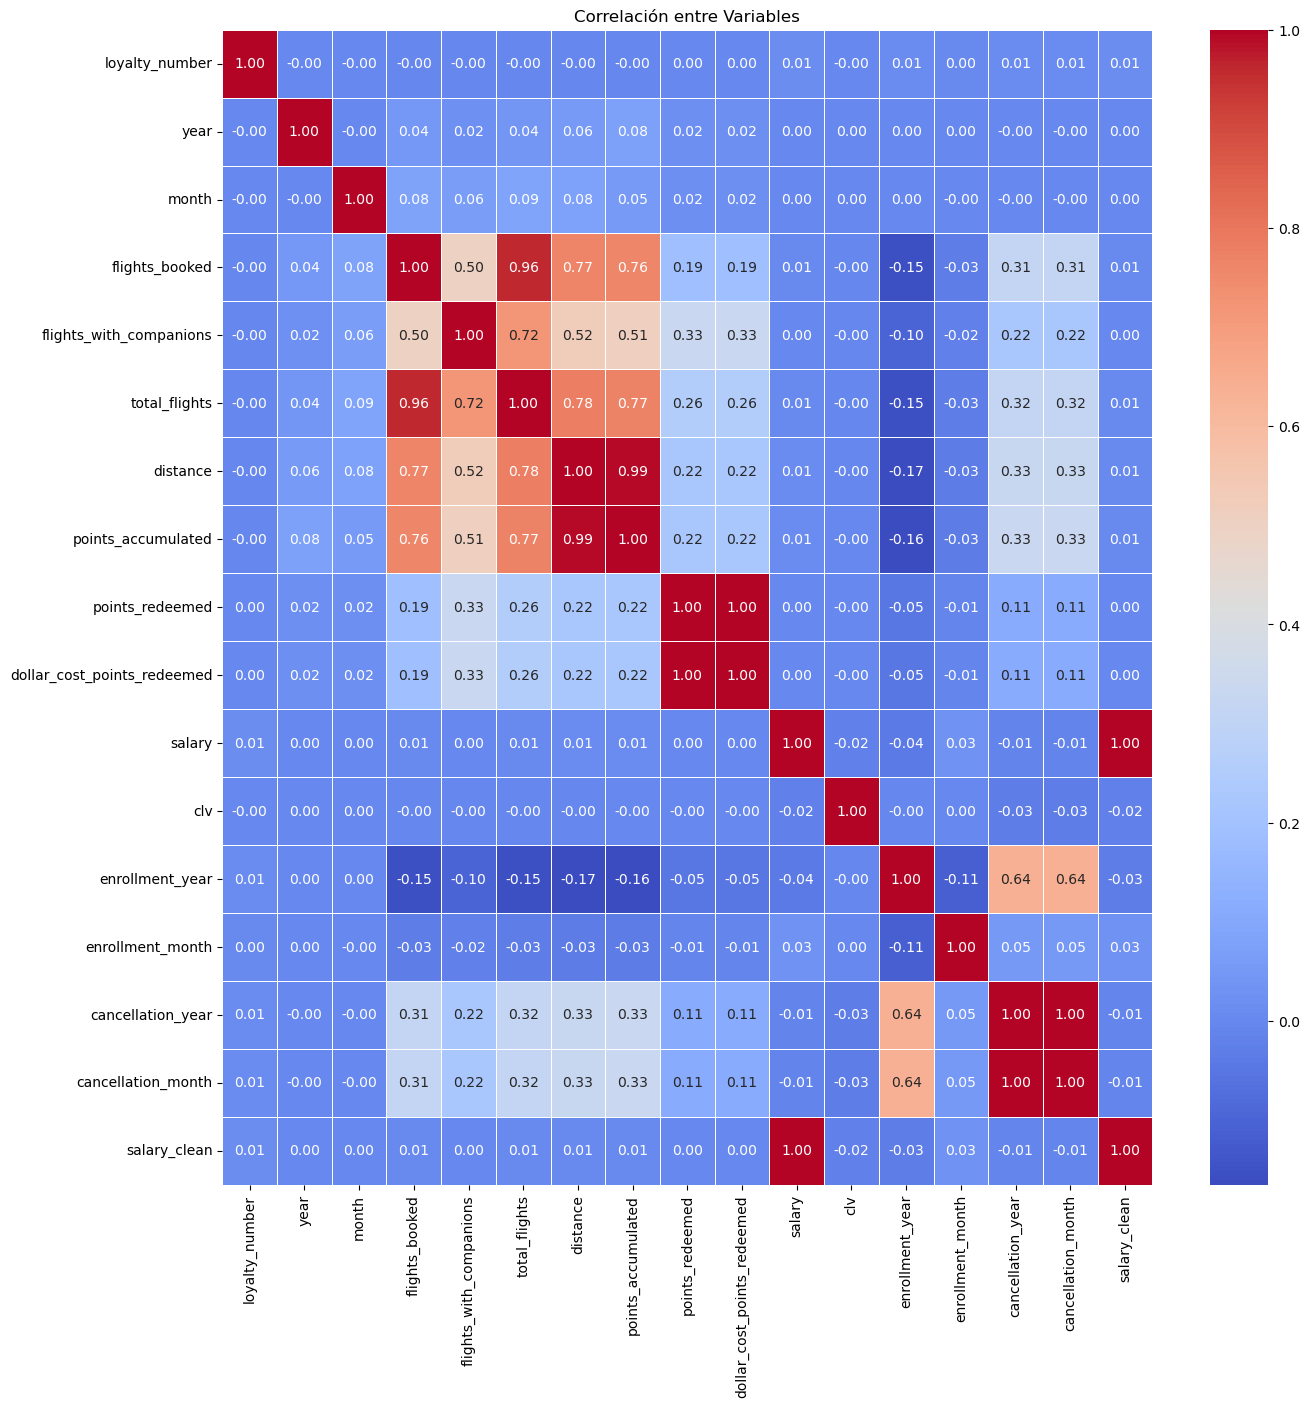

In [ ]:
# Visualización de la matriz de correlación utilizando seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlación entre Variables')

plt.show()